In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime


## Plot Function
this function perform plot the selected colums 

In [18]:
def plot(columns_to_plot, df):
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

    for col_idx in columns_to_plot:
        col_name = df.columns[col_idx]
        plt.plot(df["Zeit"], df.iloc[:, col_idx], label=f"Column {col_name}")

    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.title("Columns Over Time")
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    #plt.xticks([])  # Hide x-axis tick labels
    #plt.yticks([])  # Hide y-axis tick labels
    plt.tight_layout()
    plt.show()

In [24]:
def plot_threshold(columns_to_plot, df, start_time, end_time):
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

    # Filter data within the specified time range
    mask = (df["Zeit"] >= start_time) & (df["Zeit"] <= end_time)
    df_filtered = df[mask]

    for col_idx in columns_to_plot:
        col_name = df.columns[col_idx]
        plt.plot(df_filtered["Zeit"], df_filtered.iloc[:, col_idx], label=f"Column {col_name}")

    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.title("Columns Over Time")
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    #plt.xticks([])  # Hide x-axis tick labels
    #plt.yticks([])  # Hide y-axis tick labels
    plt.tight_layout()
    plt.show()


## Plot All Function
this function perform plot for all columns 

In [ ]:
def plotAll(data_frame):
    num_columns = len(data_frame.columns)
    num_rows = (num_columns + 2) // 3  # Create a grid with 3 columns

    plt.figure(figsize=(15, 5 * num_rows))  # Adjust the figure size as needed

    for i, col in enumerate(data_frame.columns):
        plt.subplot(num_rows, 3, i + 1)  # Create a subplot
        plt.plot(data_frame["Zeit"], data_frame[col])
        plt.xlabel("Time")  # Set x-axis label to empty string to hide it
        plt.ylabel(col)
        plt.title(f"{col} Over Time")
        plt.grid(True)
        plt.xticks([])  # Hide x-axis tick labels
        plt.yticks([])  # Hide y-axis tick labels

    plt.tight_layout()
    plt.show()



In [19]:
def convert_to_linear_time(date_time_str):
    input_format = "%Y-%m-%d %H:%M:%S.%f"
    dt_object = datetime.strptime(date_time_str, input_format)
    linear_time = dt_object.timestamp()
    
    return linear_time

## load CSV File

In [20]:
csv_file = "zyk.csv"
df = pd.read_csv(csv_file, skiprows=[1])  # Skip the second row with headers

#print( df.head())

num_rows, num_columns = df.shape

print(f"Number of rows (length): {num_rows}")
print(f"Number of columns (width): {num_columns}")

Number of rows (length): 24697
Number of columns (width): 18


In [21]:
df['Zeit'] = df['Zeit'].apply(convert_to_linear_time)
df['Zeit'] = df['Zeit'] - df['Zeit'].iloc[0]
df['Zeit'] = df['Zeit'] / 3600

In [22]:
first_entry_time = df['Zeit'].iloc[0]
last_entry_time = df['Zeit'].iloc[-1]
print(f"Time of First Entry: {first_entry_time} seconds")
print(f"Time of Last Entry: {last_entry_time} seconds")


Time of First Entry: 0.0 seconds
Time of Last Entry: 40.028619444436494 seconds


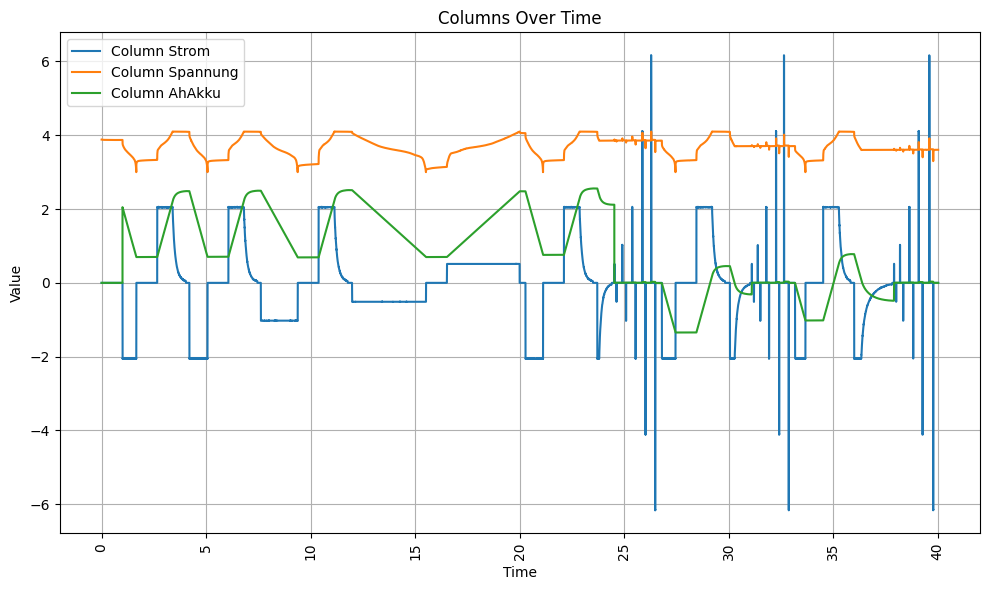

In [23]:
columns_to_plot = [16,15,9]  # Replace with the actual column names you want to plot
plot(columns_to_plot,df)

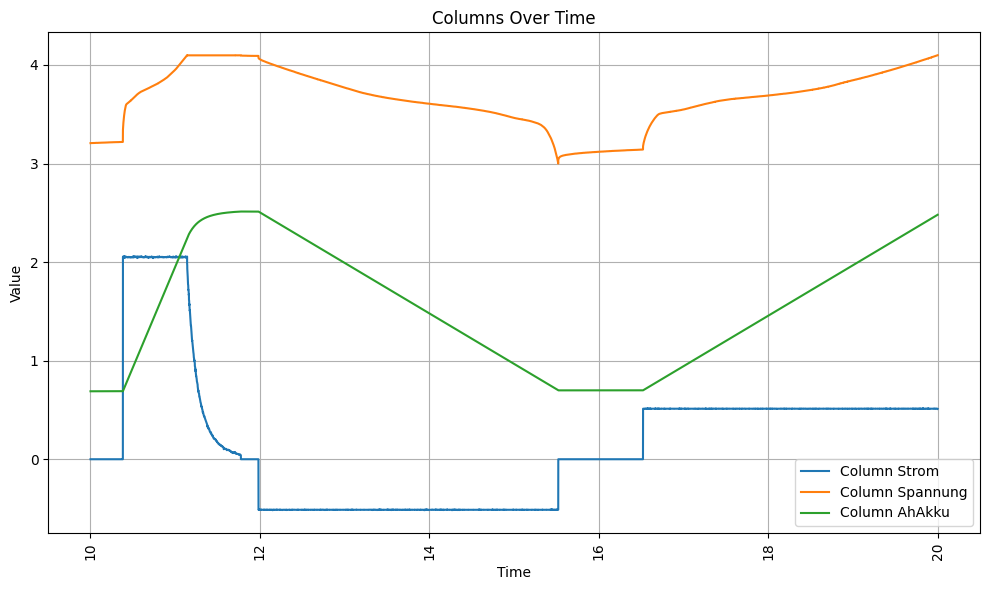

In [25]:
columns_to_plot = [16,15,9]  # Replace with the actual column names you want to plot
plot_threshold(columns_to_plot, df, 10, 20)

In [ ]:
plotAll(df)

## Plot Ahaku
this will plot data of ahakku 

In [ ]:
columns_to_plot = [9]  # Replace with the actual column no. you want to plot
plot(columns_to_plot,df)

In [26]:
import os
import glob
import pandas as pd

In [27]:
folder_path = "data"

csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

dataframes = []

# Loop through the CSV files and load them into DataFrames
for csv_file in csv_files:
    dfarr = pd.read_csv(csv_file, skiprows=[1])
    dfarr['Zeit'] = dfarr['Zeit'].apply(convert_to_linear_time)
    dfarr['Zeit'] = dfarr['Zeit'] - dfarr['Zeit'].iloc[0]
    dfarr['Zeit'] = dfarr['Zeit'] / 3600
    dataframes.append(dfarr)

noFiles = 0
for i, dfarr in enumerate(dataframes):
    num_rows, num_columns = dfarr.shape
    print(f"DataFrame {i + 1} - Rows: {num_rows}, Columns: {num_columns}")
    noFiles = noFiles + 1
print(noFiles)

DataFrame 1 - Rows: 89410, Columns: 18
DataFrame 2 - Rows: 24697, Columns: 18
DataFrame 3 - Rows: 73298, Columns: 18
DataFrame 4 - Rows: 88666, Columns: 18
DataFrame 5 - Rows: 24345, Columns: 18
DataFrame 6 - Rows: 88428, Columns: 18
DataFrame 7 - Rows: 24937, Columns: 18
DataFrame 8 - Rows: 88300, Columns: 18
DataFrame 9 - Rows: 24891, Columns: 18
DataFrame 10 - Rows: 88156, Columns: 18
DataFrame 11 - Rows: 25275, Columns: 18
DataFrame 12 - Rows: 24968, Columns: 18
DataFrame 13 - Rows: 82806, Columns: 18
DataFrame 14 - Rows: 25748, Columns: 18
DataFrame 15 - Rows: 88059, Columns: 18
DataFrame 16 - Rows: 28881, Columns: 18
DataFrame 17 - Rows: 88009, Columns: 18
DataFrame 18 - Rows: 27547, Columns: 18
DataFrame 19 - Rows: 87786, Columns: 18
DataFrame 20 - Rows: 28306, Columns: 18
DataFrame 21 - Rows: 87437, Columns: 18
DataFrame 22 - Rows: 28828, Columns: 18
DataFrame 23 - Rows: 86887, Columns: 18
DataFrame 24 - Rows: 28577, Columns: 18
DataFrame 25 - Rows: 85831, Columns: 18
DataFrame

test that data is loaded succesfully

In [ ]:
num_rows, num_columns = dataframes[1].shape

print(f"Number of rows (length): {num_rows}")
print(f"Number of columns (width): {num_columns}")
#print(f"Type: {dataframes}")

## Plot All Dates
function to take an array of DataFrames and plot the specified columns from each DataFrame in a single plot

In [ ]:
def plotAllDates(dataframes, columns_to_plot):
    for df in dataframes:
        for col_idx in columns_to_plot:
            col_name = df.columns[col_idx]
            plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
            plt.plot(df["Zeit"], df.iloc[:, col_idx])
            plt.xlabel("Time")
            plt.ylabel(col_name)
            plt.title(f"Column {col_name} Over Time")
            plt.grid(True)
            #plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
            plt.xticks([])  # Hide x-axis tick labels
            #plt.yticks([])  # Hide y-axis tick labels
            plt.tight_layout()
            plt.show()

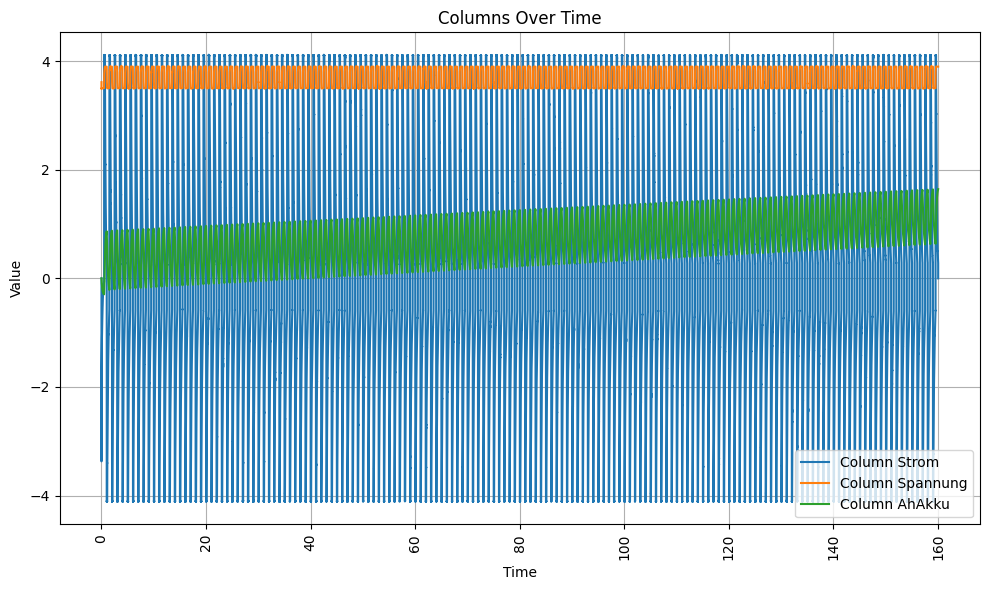

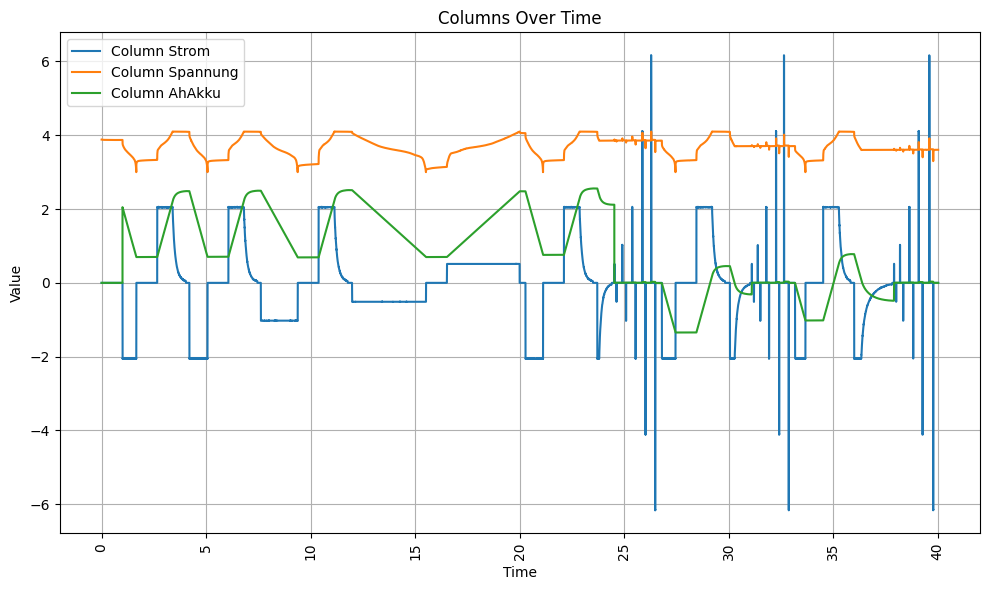

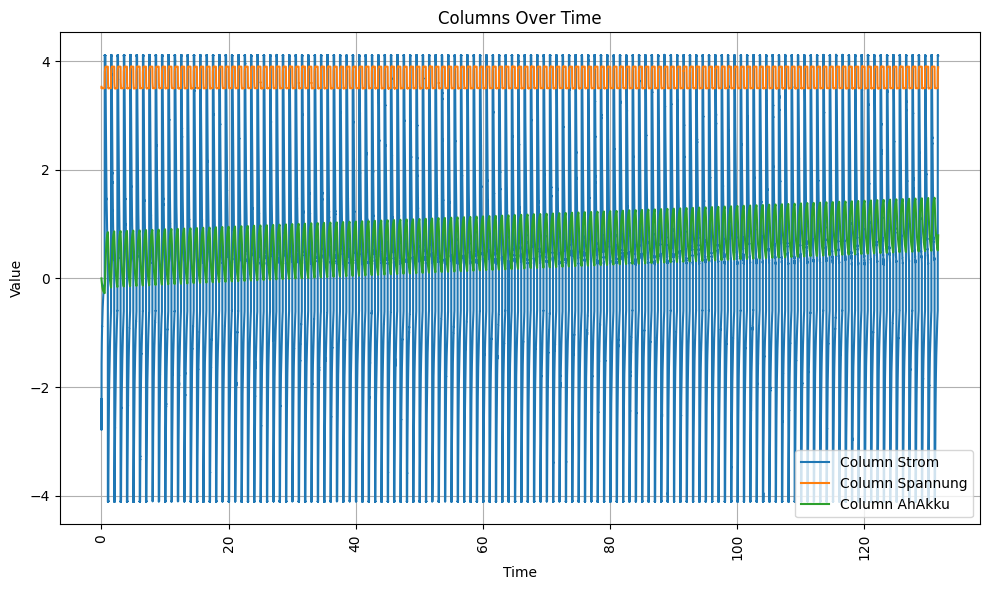

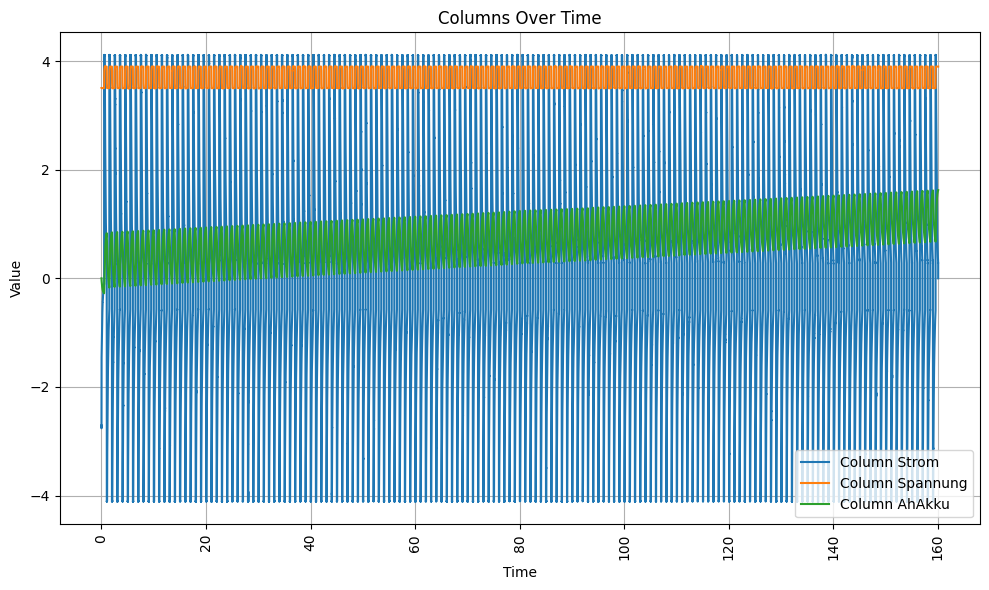

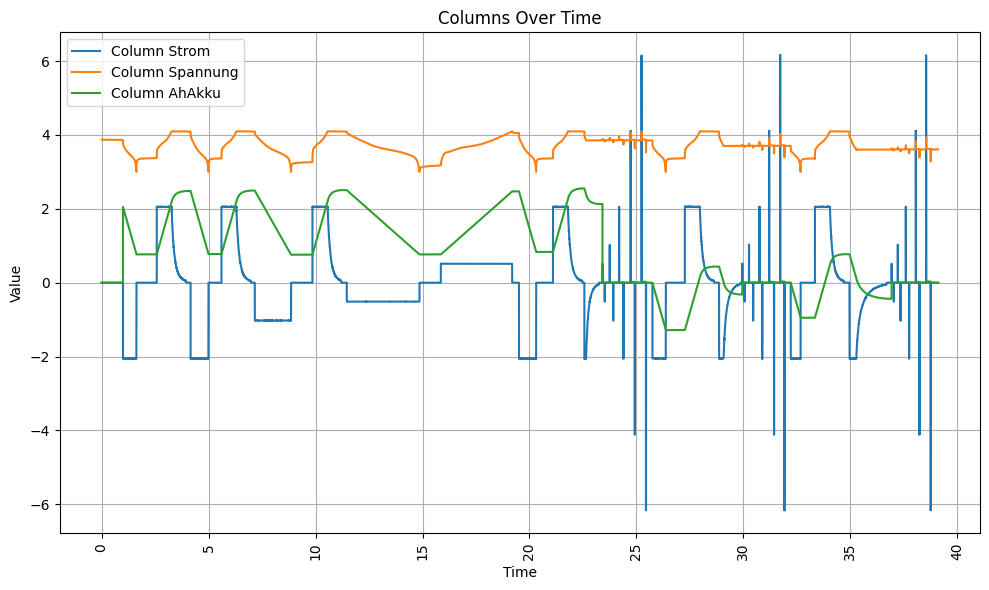

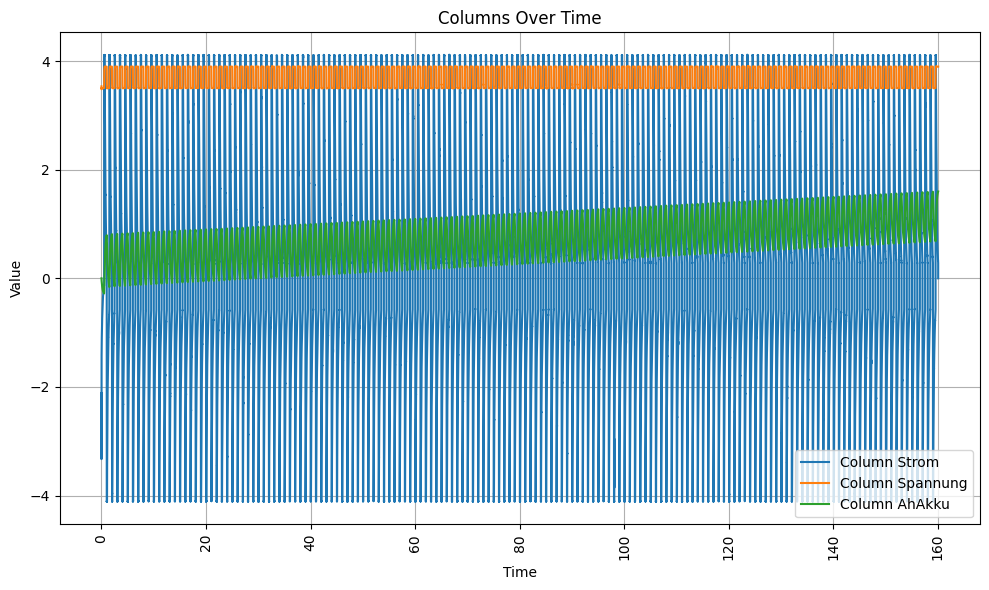

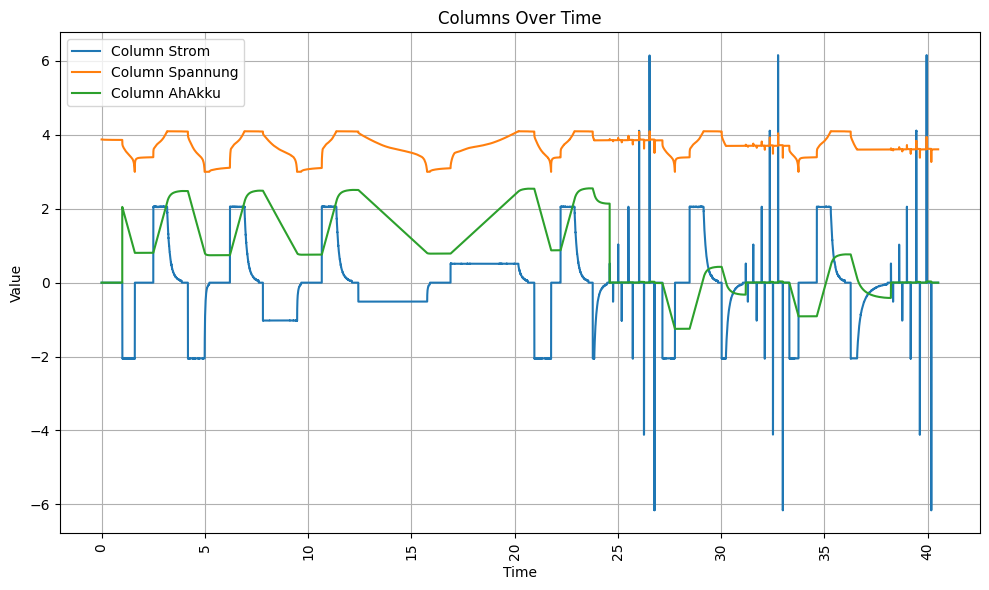

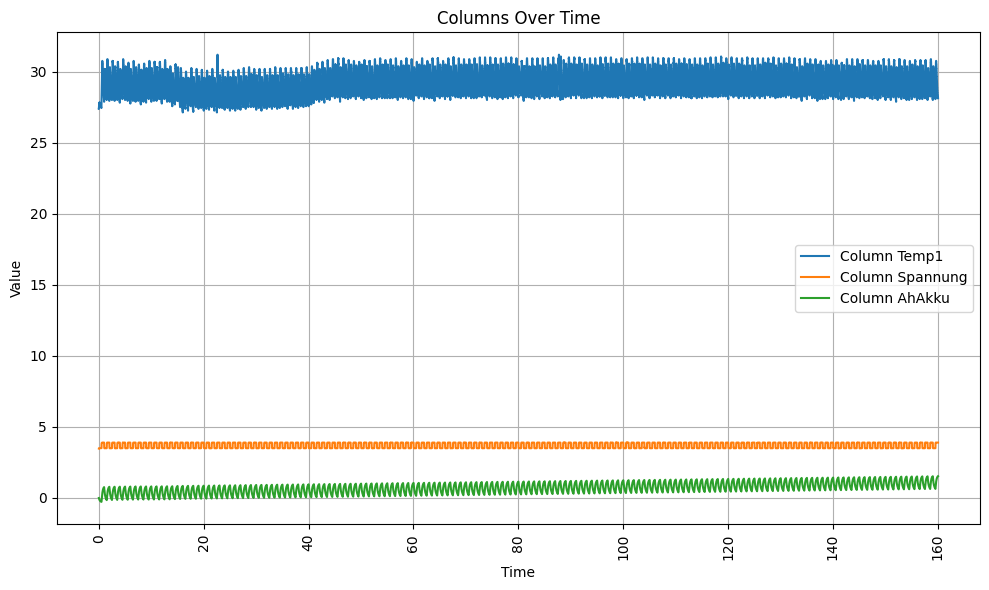

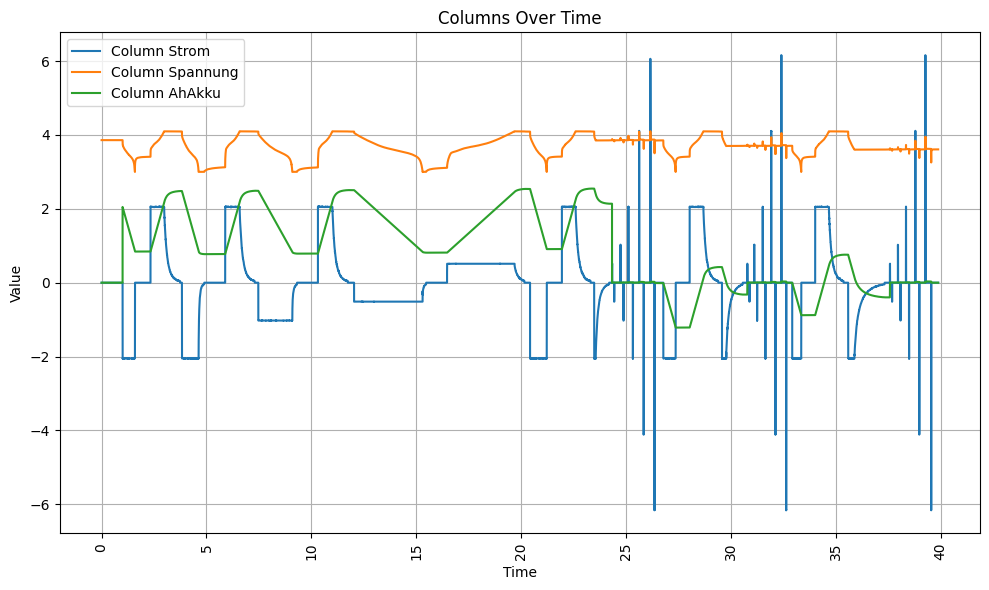

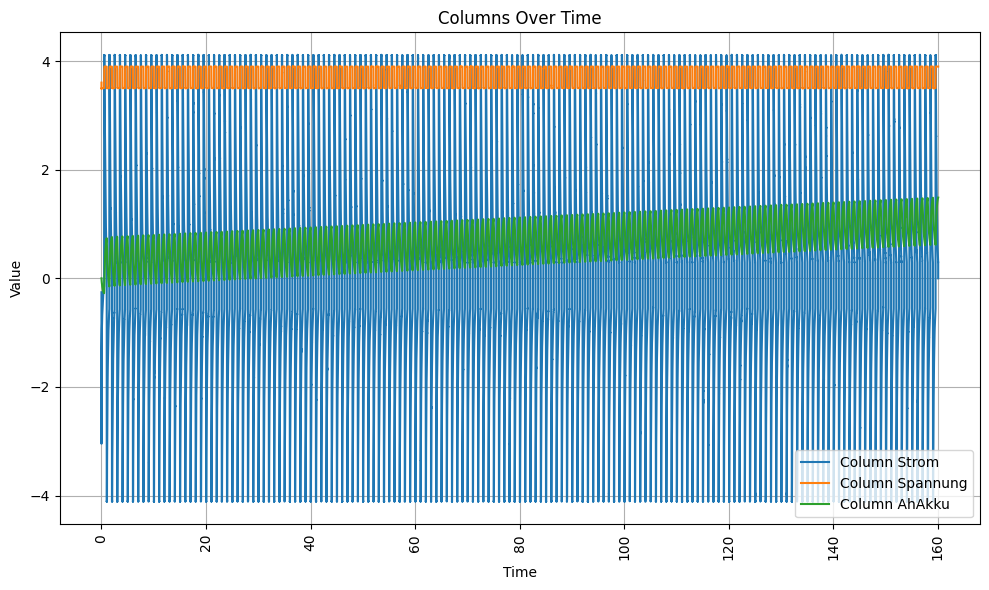

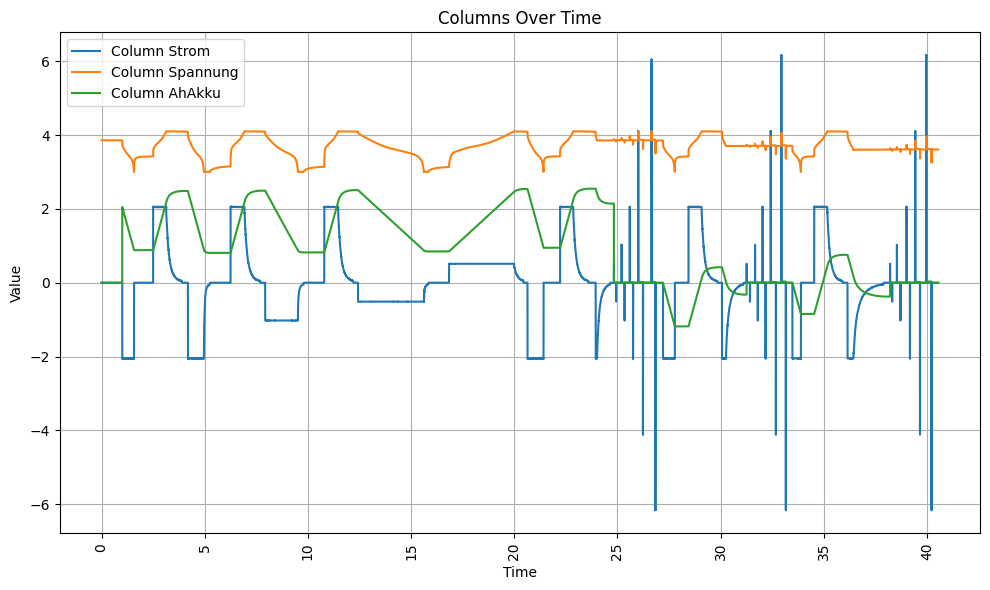

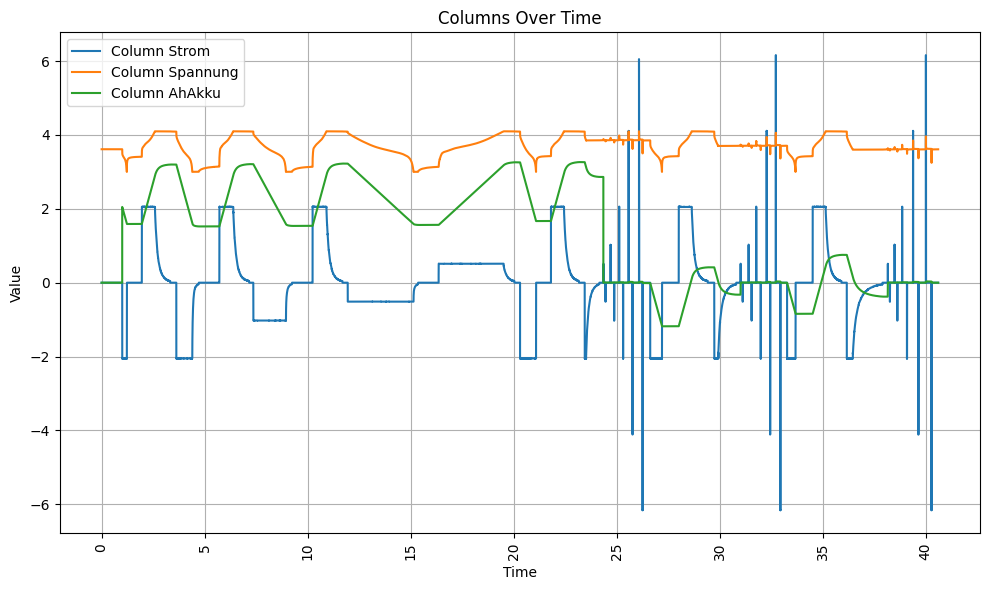

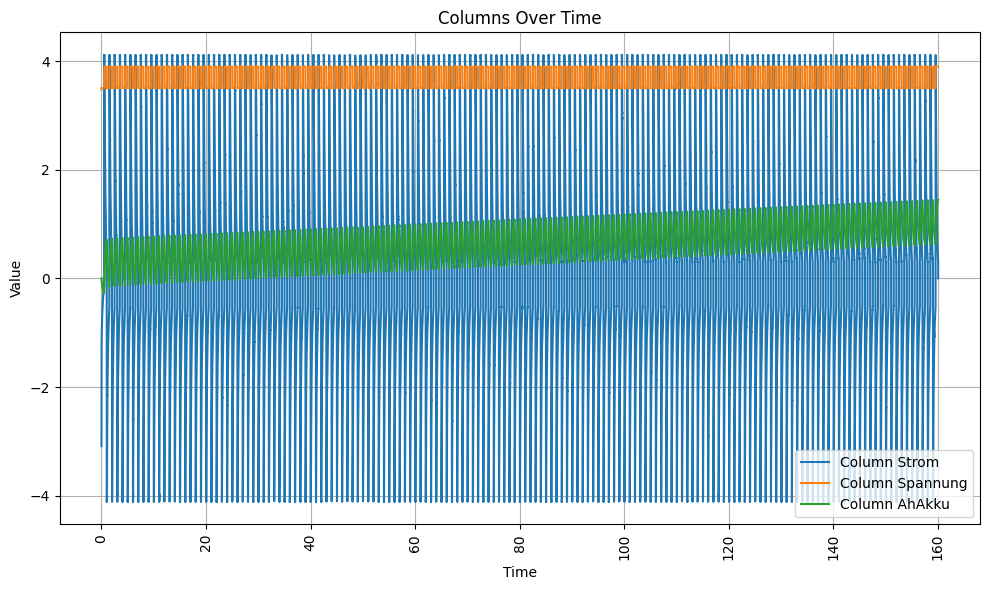

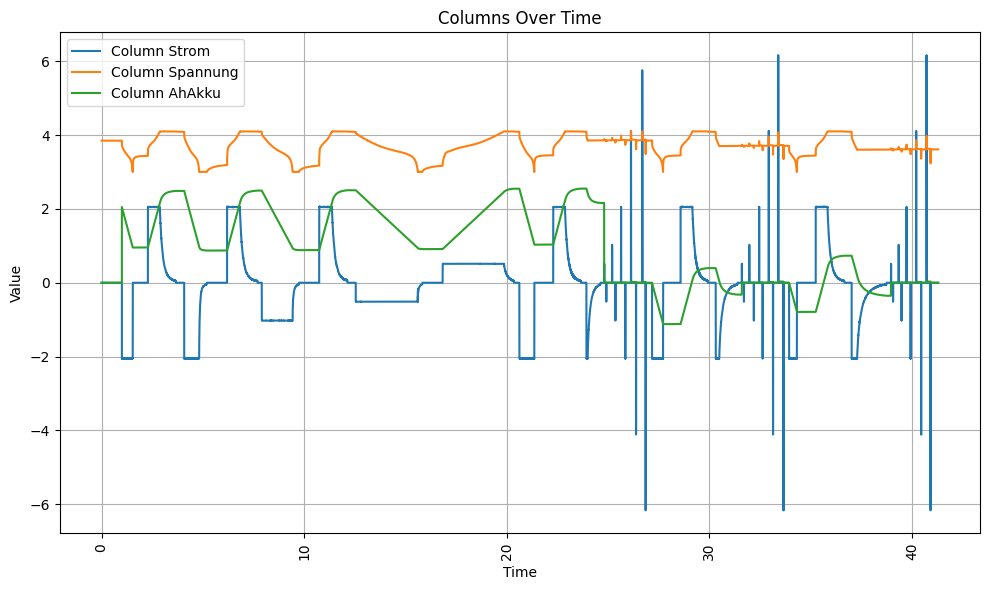

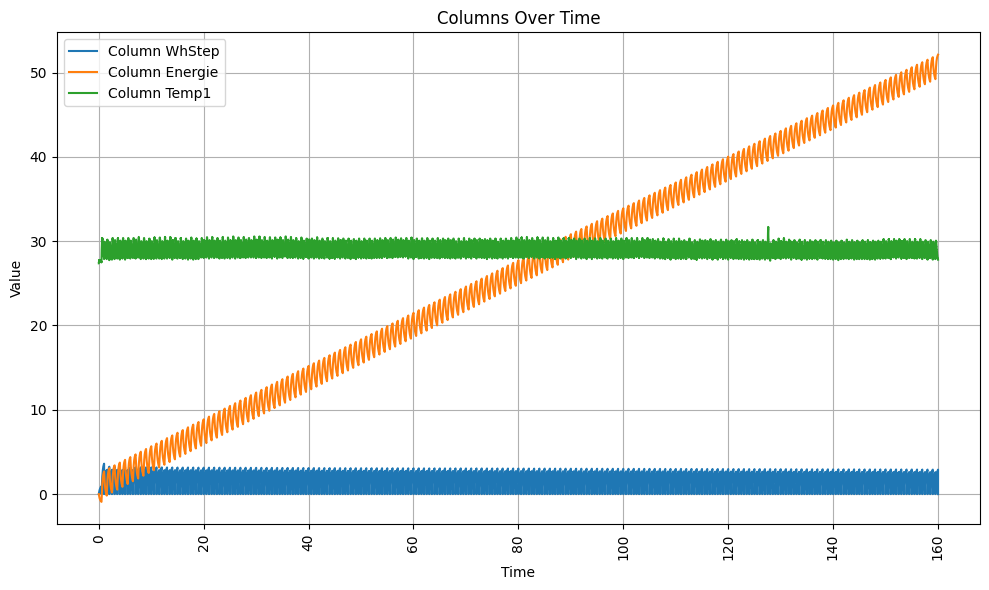

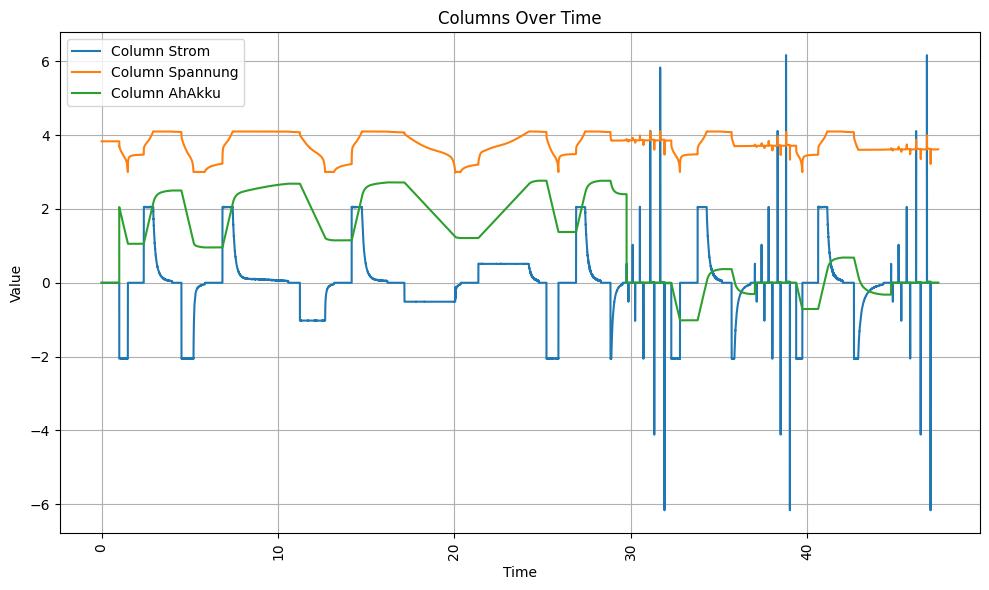

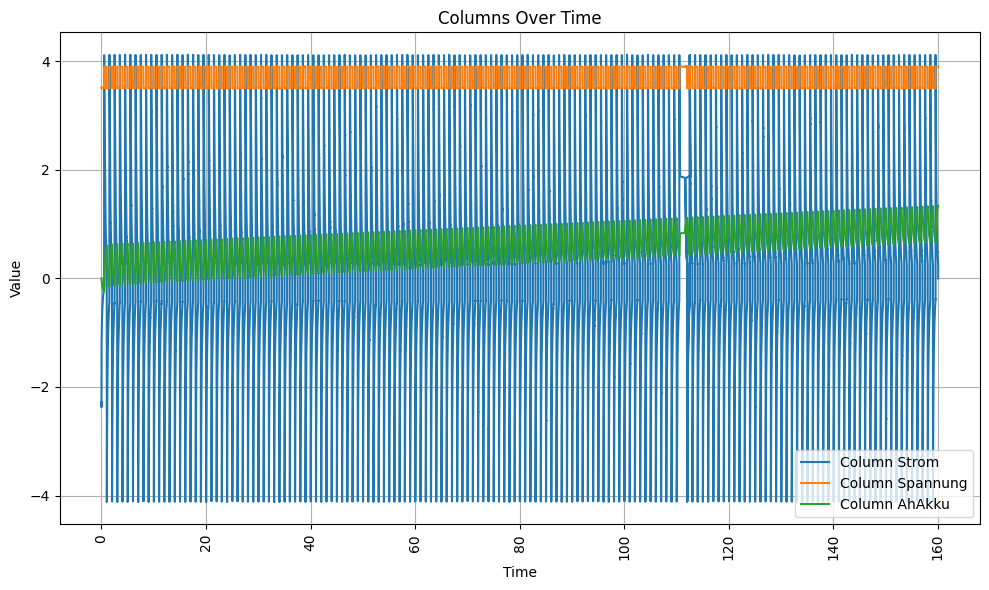

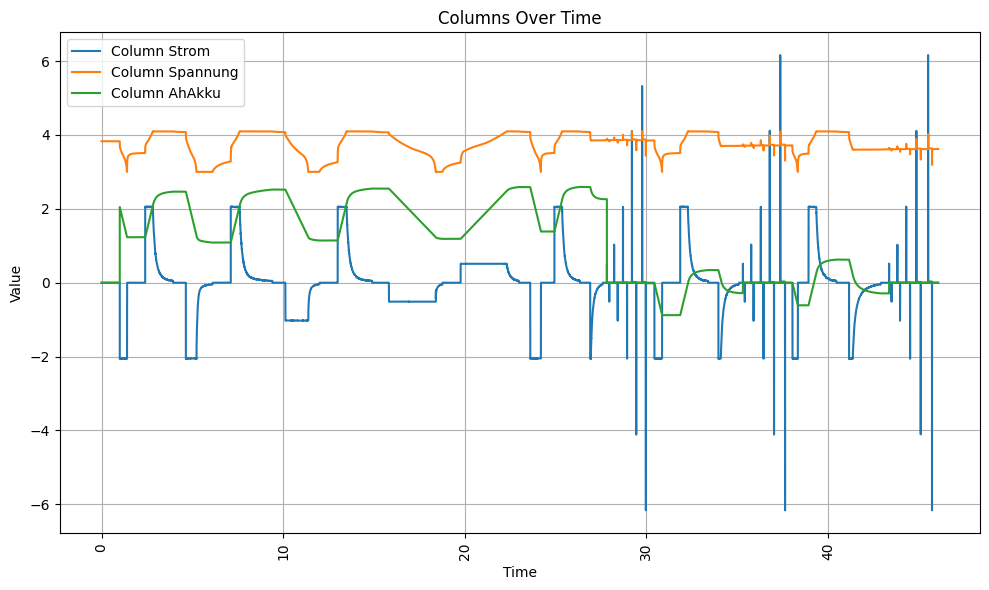

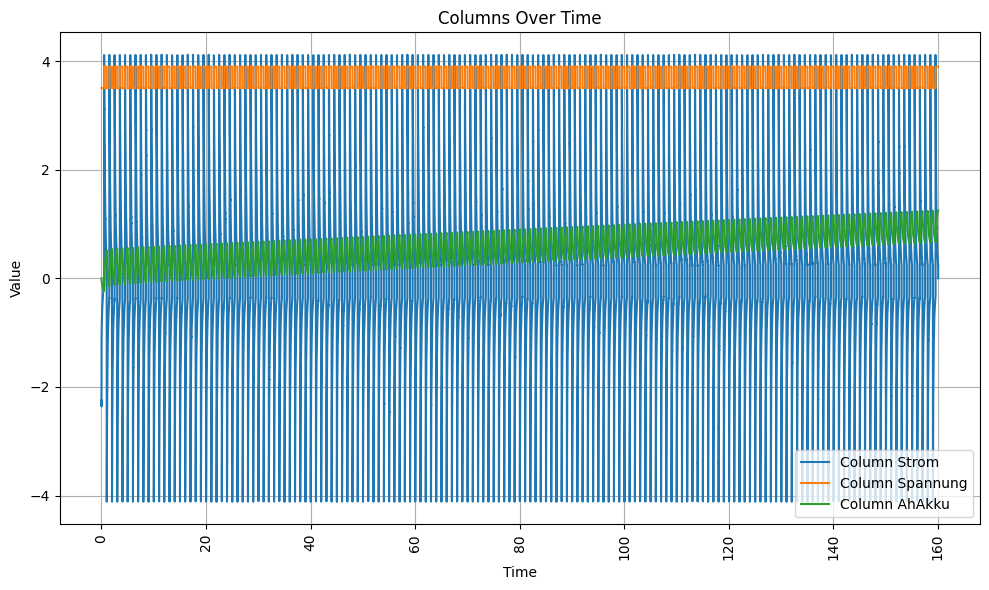

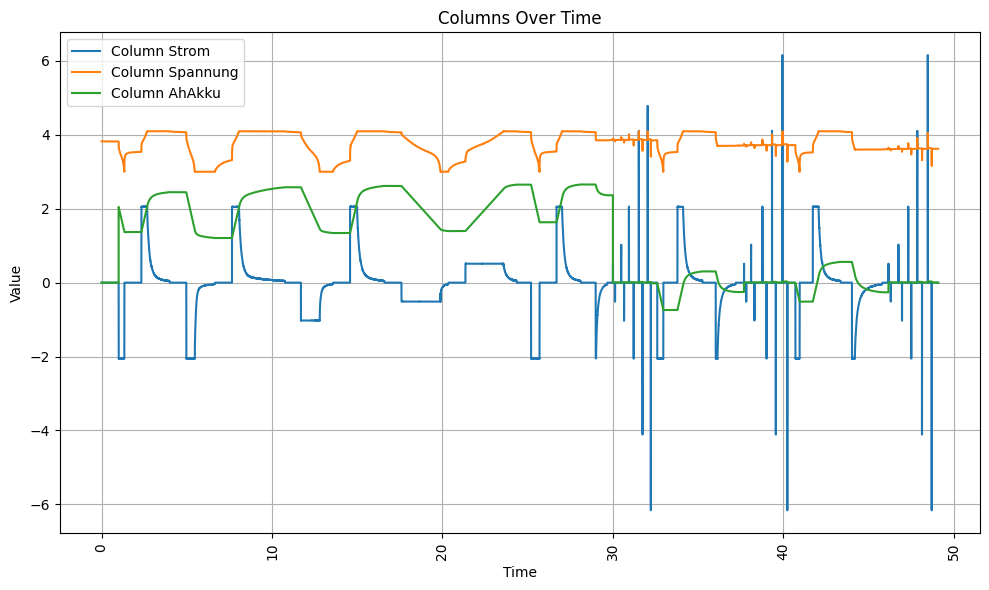

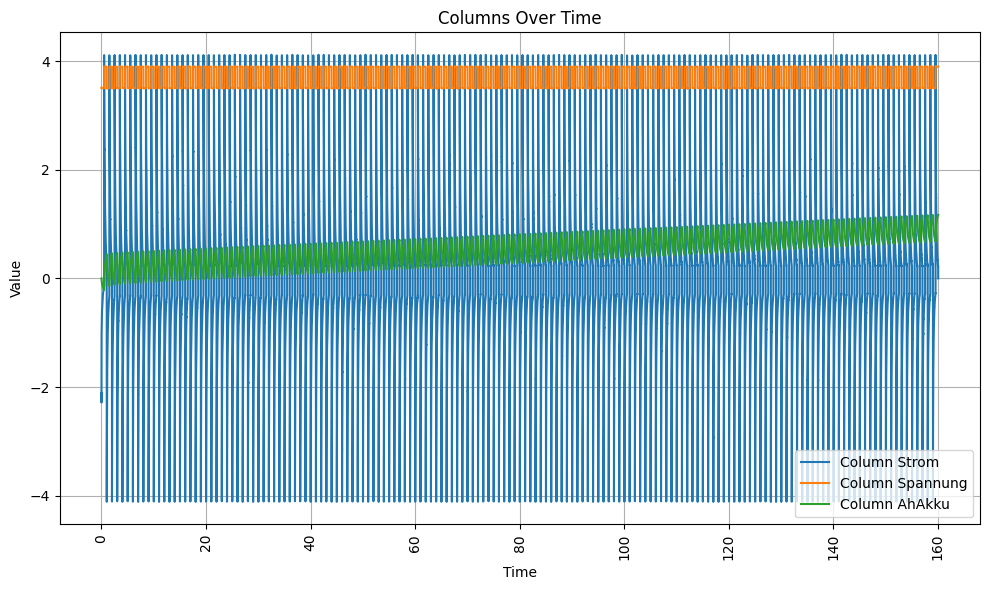

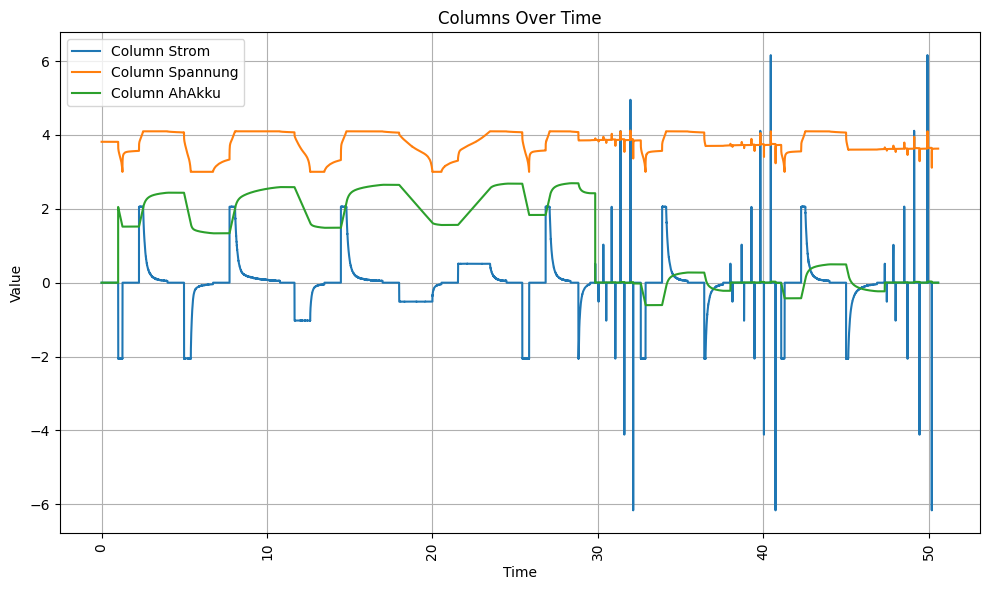

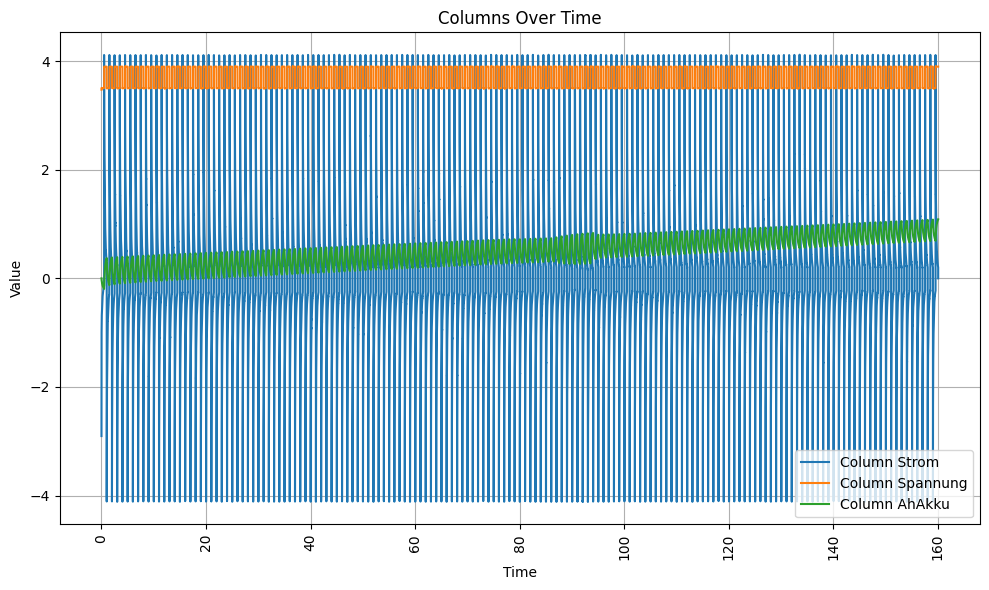

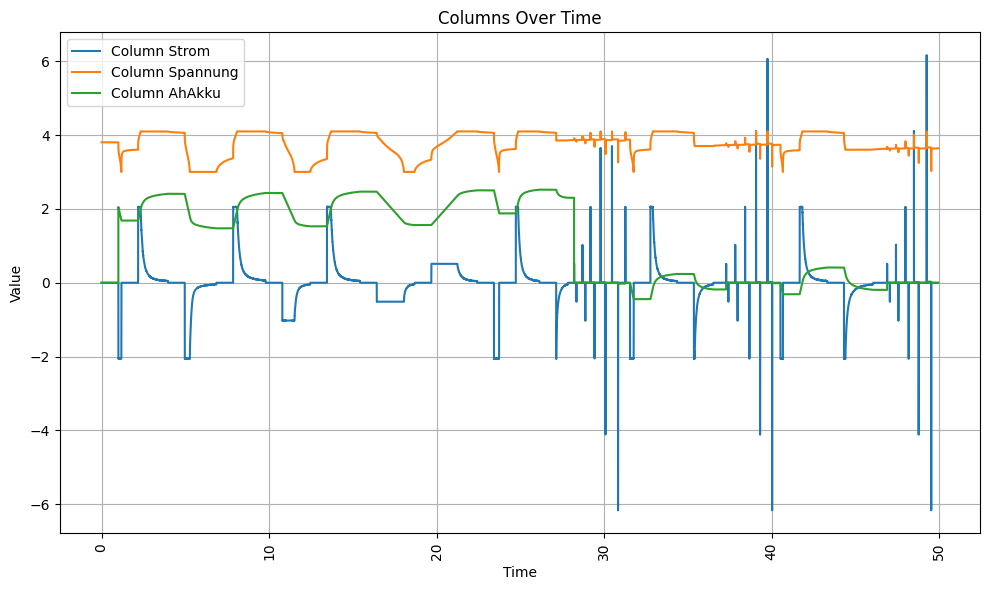

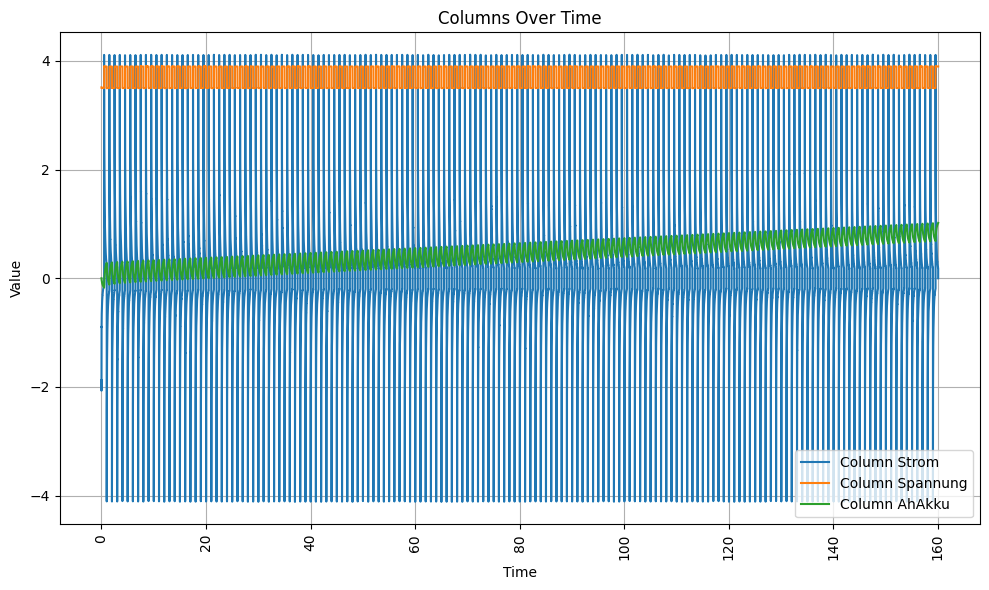

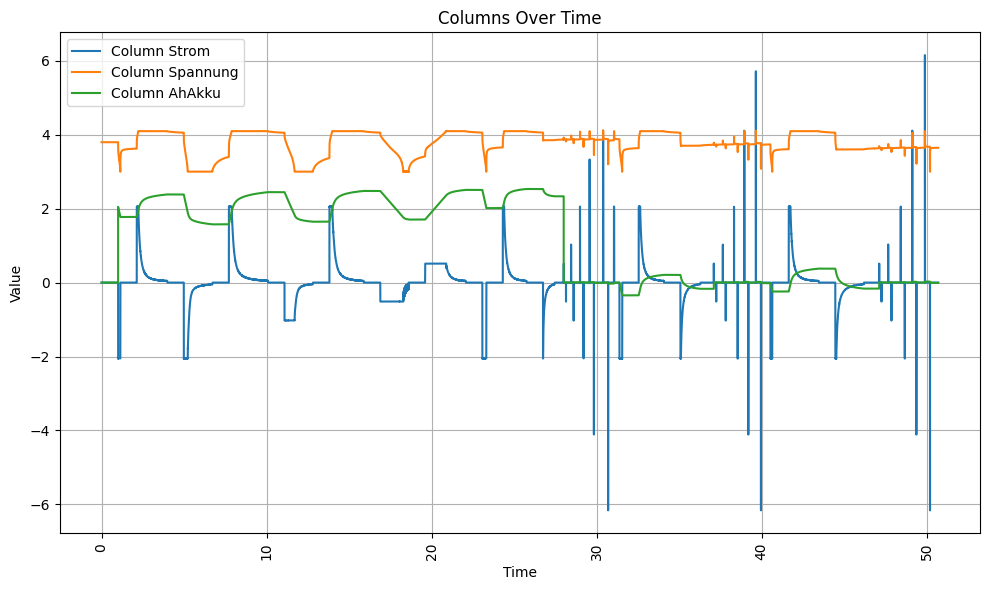

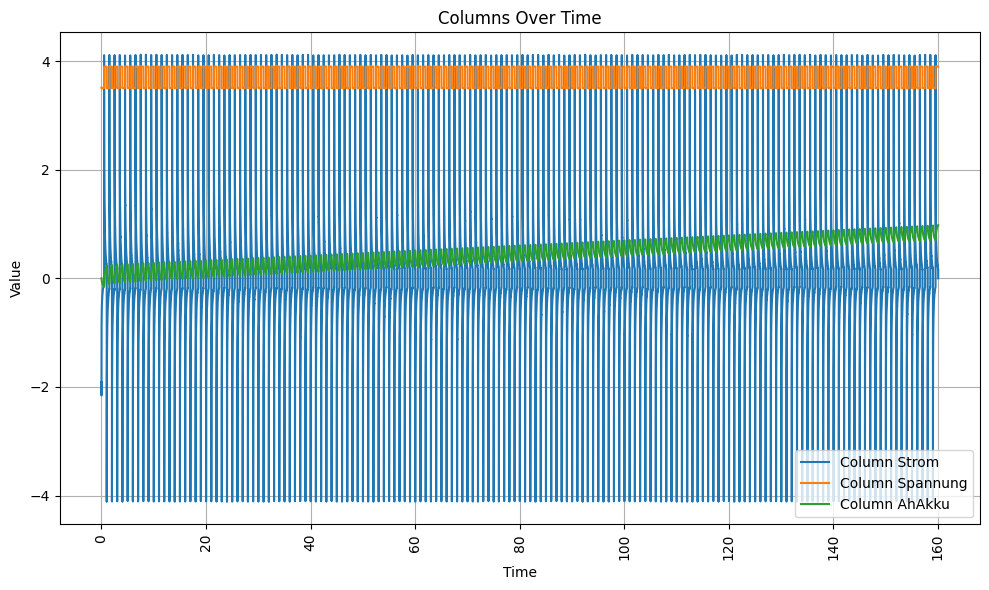

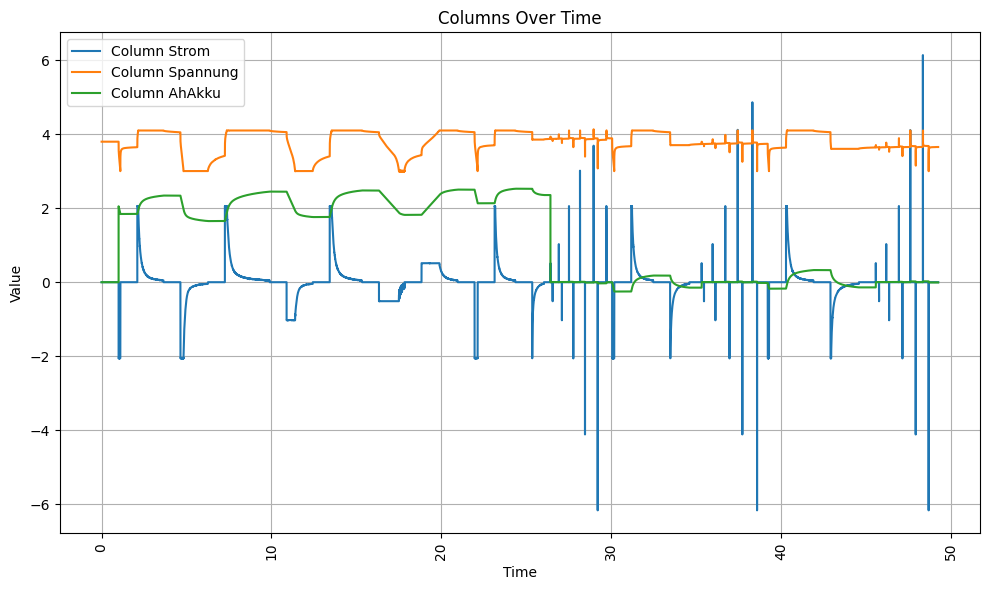

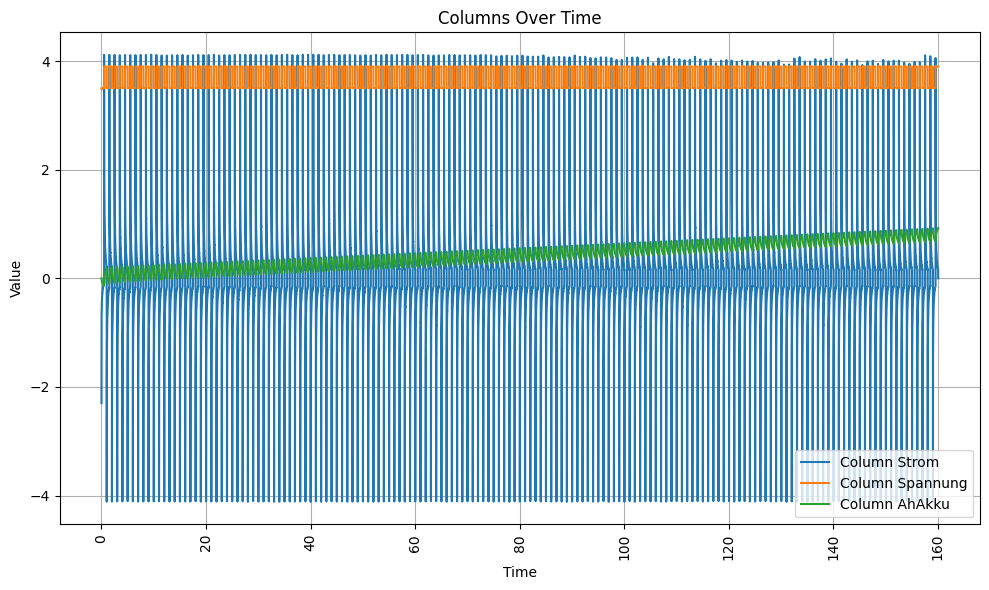

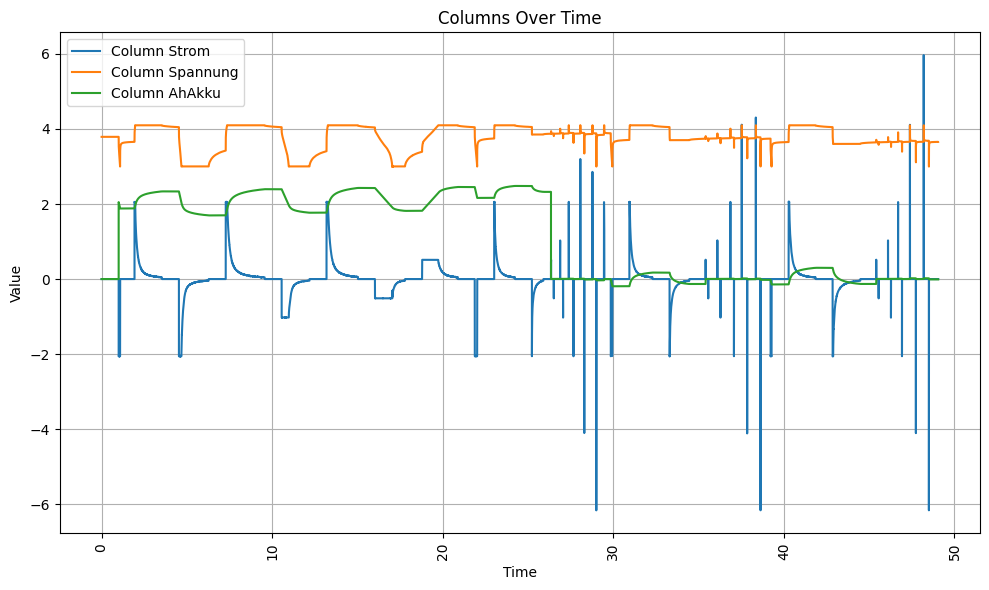

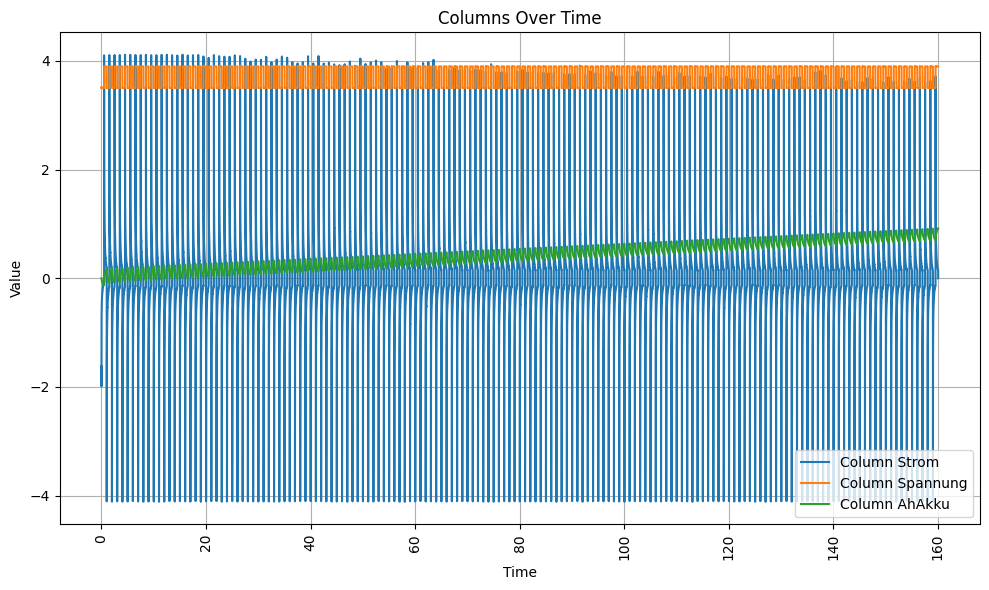

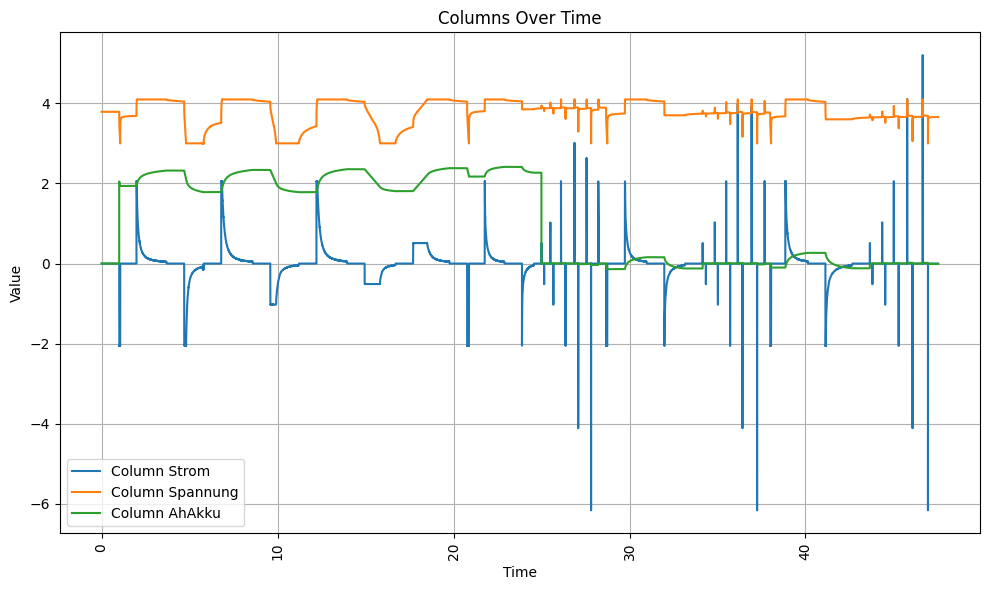

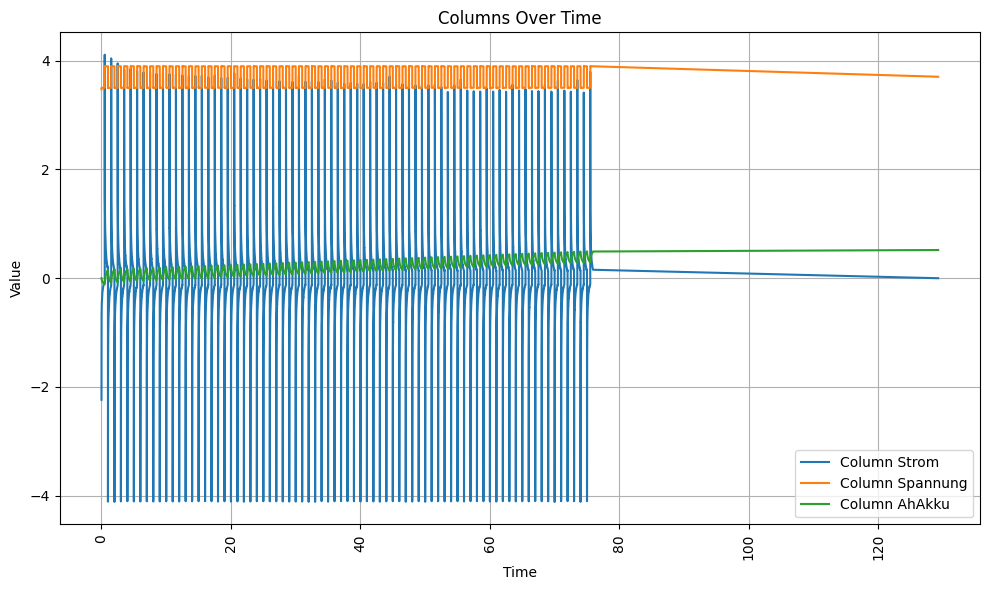

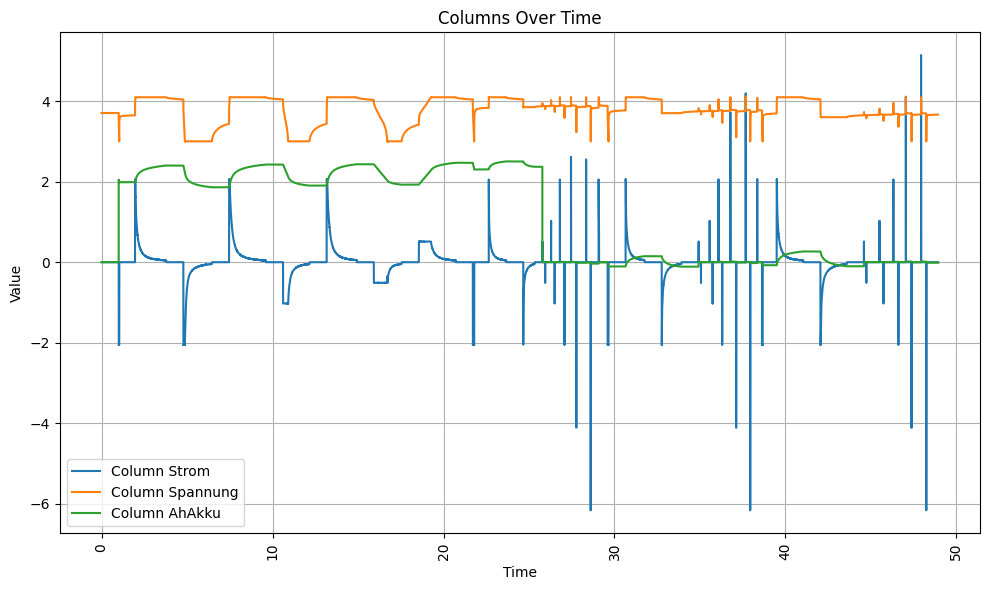

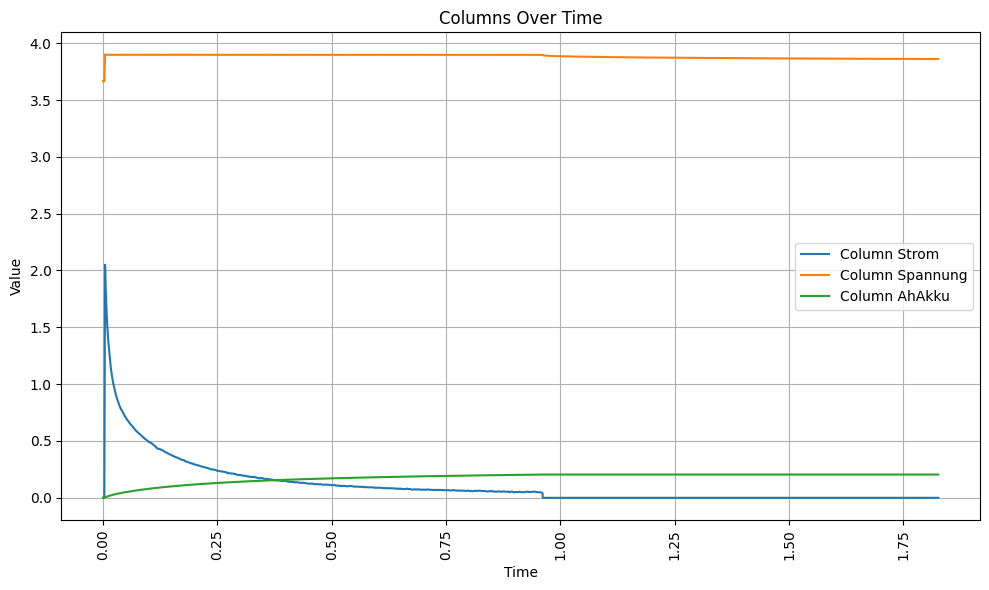

In [28]:
columns_to_plot = [16,15,9] 
#plotAllDates(dataframes[0],columns_to_plot)
I = 0
for i in dataframes:
    plot(columns_to_plot,dataframes[I])
    I=I+1

In [ ]:

def plotAllDatesS(dataframes, columns_to_plot):
    num_columns_to_plot = len(columns_to_plot)

    for col_idx in columns_to_plot:
        plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

        for df in dataframes:
            col_name = df.columns[col_idx]
            plt.plot(df["Zeit"], df.iloc[:, col_idx], label=f"DataFrame {dataframes.index(df) + 1}")

        plt.xlabel("Time")
        plt.ylabel(col_name)
        plt.title(f"Column {col_name} Over Time")
        plt.grid(True)
        plt.legend()
        #plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
        plt.xticks([])  # Hide x-axis tick labels
        #plt.yticks([])  # Hide y-axis tick labels
        plt.tight_layout()
        plt.show()


In [ ]:
columns_to_plot = [9] 
plotAllDates(dataframes,columns_to_plot)